# WELCOME!

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

In [1]:
#pip install xgboost

In [2]:
#pip install sklearn

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [6]:
male = pd.read_csv('male.csv', encoding='latin-1')

In [7]:
male.T

0               1               2                       3                       4                       5                       6                       7                       8               9                       10                           11              12                      13            14                      15            16                      17            18            19            20                      21            22                      23            24            25            26            27                      28              29                      30            31                      32                      33                      34                      35                      36                      37                      38                      39                      40                      41                      42                      43                      44                      45    \
subjectid                              10027           10032           10033                   10092                   10093                   10115                   10117                   10237                   10242           10244                   10246                        10260           10265                   10272         10286                   10293         10303                   10304         10305         10310         10312                   10319         10338                   10339         10340         10341         10349         10354                   10358           10361                   10367         10368                   10371                   10385                   10389                   10404                   10406                   10419                   10422                   10423                   10427                   10447                   10451                   10460                   10467                   10471   
abdominalextensiondepthsitting           266             233             287                     234                     250                     263                     314                     304                     321             227                     272                          227             268                     288           261                     308           245                     310           225           270           209                     245           258                     219           286           250           321           247                     240             268                     193           294                     245                     261                     230                     301                     261                     339                     204                     285                     212                     322                     219                     273                     305                     204   
acromialheight                          1467            1395            1430                    1347                    1585                    1407                    1476                    1529                    1457            1481                    1450                         1416            1504                    1539          1379                    1460          1384                    1455          1427          1468          1450                    1370          1340                    1624          1423          1326          1486          1469                    1425            1480                    1538          1429                    1363                    1543                    1432                    1483                    1386                    1544                    1412                    1430                    1438                    1374                    1502                    1414                    1440                    1328   
acromionradialelength                    337             326             341                     310        

In [8]:
female = pd.read_csv('female.csv', encoding='latin-1')

In [9]:
female.head()


SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [8]:
female.describe().T

count          mean           std      min       25%      50%       75%       max
SubjectId                       1986.0  22306.606244  20904.730297  10037.0  17667.00  22096.5  26089.75  920103.0
abdominalextensiondepthsitting  1986.0    229.651057     31.464691    155.0    207.00    227.0    249.00     358.0
acromialheight                  1986.0   1335.095166     58.079885   1115.0   1298.00   1332.0   1374.00    1536.0
acromionradialelength           1986.0    311.198389     17.164691    249.0    300.00    311.0    323.00     371.0
anklecircumference              1986.0    215.739678     14.891757    170.0    205.00    215.0    225.00     275.0
axillaheight                    1986.0   1239.029708     55.801958   1038.0   1202.00   1236.0   1277.00    1419.0
balloffootcircumference         1986.0    228.110272     11.771007    194.0    220.00    227.0    236.00     270.0
balloffootlength                1986.0    182.051360      9.641920    151.0    175.00    182.0    188.00     216.0
biacromialbreadth               1986.0    365.348943     18.298851    283.0    353.00    365.0    378.00     422.0
bicepscircumferenceflexed       1986.0    305.578550     30.757033    216.0    285.00    304.0    324.00     435.0
bicristalbreadth                1986.0    273.299597     22.260454    197.0    258.00    273.0    287.00     362.0
bideltoidbreadth                1986.0    450.324270     28.687416    357.0    430.00    450.0    469.00     558.0
bimalleolarbreadth              1986.0     67.047835      3.485736     55.0     65.00     67.0     69.00      83.0
bitragionchinarc                1986.0    311.012588     14.161655    267.0    302.00    311.0    321.00     370.0
bitragionsubmandibulararc       1986.0    287.978852     15.299283    245.0    277.00    287.5    297.00     378.0
bizygomaticbreadth              1986.0    133.765358      5.563313    116.0    130.00    134.0    137.00     152.0
buttockcircumference            1986.0   1021.247734     75.894711    798.0    969.00   1018.5   1069.00    1341.0
buttockdepth                    1986.0    232.926989     24.328445    168.0    216.00    231.0    248.00     349.0
buttockheight                   1986.0    833.742195     45.730048    656.0    804.00    831.0    864.00     995.0
buttockkneelength               1986.0    590.594663     32.601670    466.0    569.00    589.0    610.00     709.0
buttockpopliteallength          1986.0    485.120342     28.721965    367.0    466.00    483.0    503.00     597.0
calfcircumference               1986.0    373.257805     28.515178    282.0    354.00    372.0    391.75     482.0
cervicaleheight                 1986.0   1395.667170     59.523731   1184.0   1355.00   1393.0   1434.00    1587.0
chestbreadth                    1986.0    269.329809     18.582988    213.0    257.00    268.0    281.00     348.0
chestcircumference              1986.0    946.858006     82.699115    695.0    889.00    940.0    999.00    1266.0
chestdepth                      1986.0    247.404330     27.338150    170.0    228.00    245.0    266.00     353.0
chestheight                     1986.0   1171.636455     55.499833    984.0   1134.00   1169.0   1209.00    1355.0
crotchheight                    1986.0    782.317221     44.636738    610.0    753.00    780.0    812.00     947.0
crotchlengthomphalion           1986.0    620.840383     42.429390    495.0    591.00    619.0    649.00     779.0
crotchlengthposterioromphalion  1986.0    341.858006     28.618167    243.0    321.00    341.0    361.00     451.0
earbreadth                      1986.0     33.220040      2.770012     25.0     31.00     33.0     35.00      42.0
earlength                       1986.0     59.360524      3.880447     46.0     57.00     60.0     62.00      74.0
earprotrusion                   1986.0     20.391239      2.655825     13.0     19.00     20.0     22.00      31.0
elbowrestheight                 1986.0    232.421954     26.250090    145.0    215.00    233.0    251.00     310.0
eyeheigh

## Explore Data

In [10]:
df = pd.concat([male, female], axis=0, ignore_index=True)
df.shape

(6068, 109)

In [10]:
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0    10027.0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1    10032.0                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2    10033.0                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3    10092.0                           

In [11]:
df['weightkg'].value_counts(dropna=False)

791     25
775     24
695     23
727     23
882     23
842     23
804     22
760     22
765     22
773     21
717     21
797     21
766     21
809     21
744     21
753     20
846     20
735     20
771     20
758     20
663     19
654     19
697     19
750     19
669     19
801     19
690     19
591     18
730     18
686     18
761     18
867     18
829     18
822     18
689     18
784     18
866     18
821     18
779     18
781     18
725     18
869     18
680     17
708     17
840     17
736     17
682     17
858     17
887     17
894     17
852     17
699     17
646     17
700     17
661     17
862     17
793     17
802     17
676     17
746     17
902     17
785     16
870     16
742     16
644     16
678     16
712     16
696     16
857     16
737     16
740     16
677     16
778     16
786     16
675     16
792     16
734     16
650     16
828     16
749     16
701     16
847     16
819     16
705     16
667     16
762     16
657     16
601     16
702     16
662     16
631     15

In [11]:
df.drop(["SubjectNumericRace","Ethnicity","subjectid","SubjectId","Date","Installation", "Component", "Branch","PrimaryMOS","weightkg"],axis=1,inplace=True)

In [13]:
df['DODRace'].value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [12]:
df = df[(df.DODRace==1)|(df.DODRace==2)|(df.DODRace==3)]
df.shape

(5769, 99)

In [13]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic"
})

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

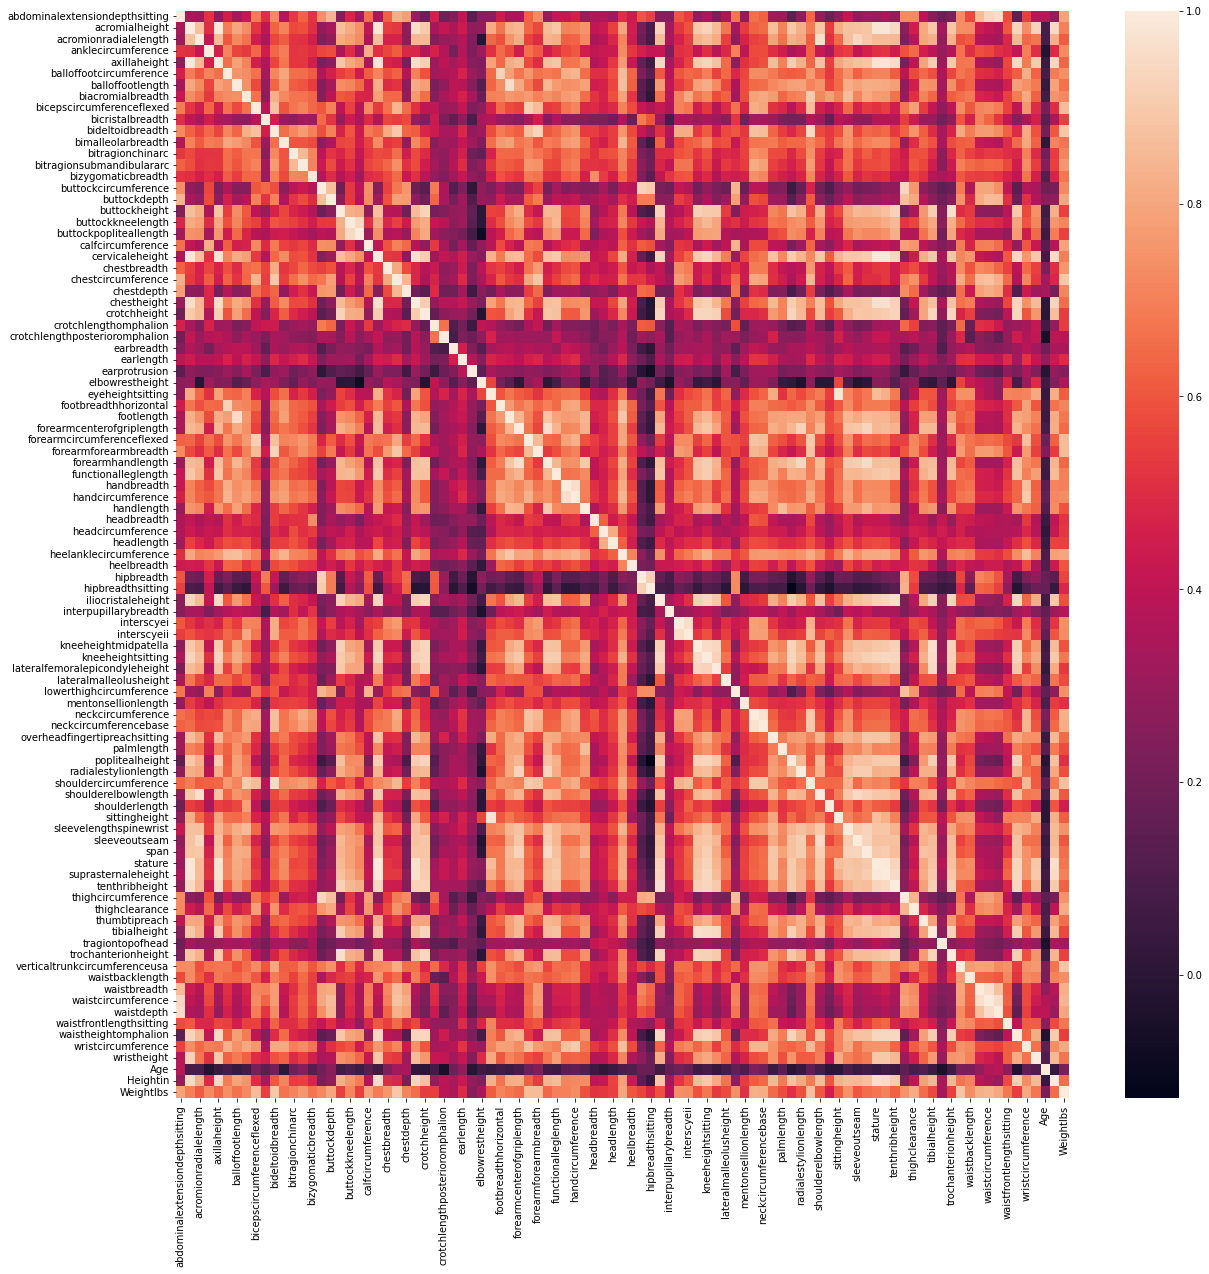

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr());

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [15]:
y = df.DODRace
X=df.drop(['DODRace'],axis=1)
X = pd.get_dummies(data=X, drop_first=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify = y)

In [20]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 233)
Train target shape   :  (4615,)
Test features shape  :  (1154, 233)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [17]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [18]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=47))]
pipe_log_model = Pipeline(steps=operations)

In [19]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[241   9  10]
 [  7 113  16]
 [ 21  94 643]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.52      0.83      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 976   36   26]
 [  22  448   73]
 [  67  345 2622]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [41]:
# We focus on Hispanic. We get scores based on this target value.
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [25]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=47))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.607626
test_precision_Hispanic    0.505797
test_recall_Hispanic       0.766296
dtype: float64

### Logistic Model GridsearchCV

In [26]:
#Picked recall as the main evaluation metric
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [27]:
param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [28]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=47))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [29]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=47))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [30]:
log_model_grid.best_params_

{'log__C': 5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [31]:
log_model_grid.best_score_

0.7660720353380904

In [32]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[243   8   9]
 [  7 113  16]
 [ 19  98 641]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.92       260
    Hispanic       0.52      0.83      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.90      0.86      0.87      1154


Train_Set
[[ 977   37   24]
 [  16  460   67]
 [  64  328 2642]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.56      0.85      0.67       543
       White       0.97      0.87      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



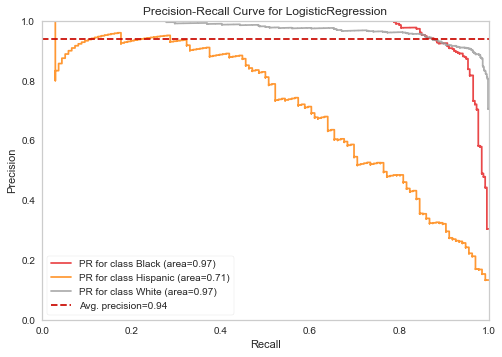

In [33]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=47))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [34]:
viz.score_

{'Black': 0.9729243640678815,
 'Hispanic': 0.708786795356958,
 'White': 0.973322709280397,
 'micro': 0.9390783800506874}

In [35]:
#For Hispanic
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [36]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=47))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [37]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[232  11  17]
 [  7 110  19]
 [ 18 103 637]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       260
    Hispanic       0.49      0.81      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 963   39   36]
 [  25  443   75]
 [  56  403 2575]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.50      0.82      0.62       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [38]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.577575
test_precision_Hispanic    0.468751
test_recall_Hispanic       0.755185
dtype: float64

###  SVC Model GridsearchCV

In [39]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [40]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=47))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [41]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=47))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [42]:
svm_model_grid.best_params_

{'svc__C': 3, 'svc__gamma': 0.01}

In [43]:
svm_model_grid.best_score_

0.7604994903160041

In [44]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[233  10  17]
 [  7 106  23]
 [ 19 105 634]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       260
    Hispanic       0.48      0.78      0.59       136
       White       0.94      0.84      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[ 944   45   49]
 [  28  434   81]
 [  58  441 2535]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.91      1038
    Hispanic       0.47      0.80      0.59       543
       White       0.95      0.84      0.89      3034

    accuracy                           0.85      4615
   macro avg       0.78      0.85      0.80      4615
weighted avg       0.89      0.85      0.86      4615



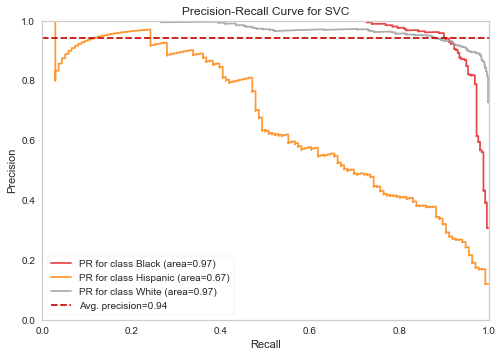

In [45]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=3, class_weight="balanced",random_state=47))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [46]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [47]:
#As this is a Decision Tree Model, I'm using ordinal encoder for categorical values.
from sklearn.preprocessing import OrdinalEncoder

In [48]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [49]:
#Finding columns with categorical values. 
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [50]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head().T

0       1       2       3       4
abdominalextensiondepthsitting   266.0   233.0   287.0   234.0   250.0
acromialheight                  1467.0  1395.0  1430.0  1347.0  1585.0
acromionradialelength            337.0   326.0   341.0   310.0   372.0
anklecircumference               222.0   220.0   230.0   230.0   247.0
axillaheight                    1347.0  1293.0  1327.0  1239.0  1478.0
balloffootcircumference          253.0   245.0   256.0   262.0   267.0
balloffootlength                 202.0   193.0   196.0   199.0   224.0
biacromialbreadth                401.0   394.0   427.0   401.0   435.0
bicepscircumferenceflexed        369.0   338.0   408.0   359.0   356.0
bicristalbreadth                 274.0   257.0   261.0   262.0   263.0
bideltoidbreadth                 493.0   479.0   544.0   518.0   524.0
bimalleolarbreadth                71.0    67.0    75.0    73.0    80.0
bitragionchinarc                 319.0   344.0   345.0   328.0   340.0
bitragionsubmandibulararc        291.0   320.0   330.0   309.0   310.0
bizygomaticbreadth               142.0   135.0   135.0   143.0   138.0
buttockcircumference             979.0   944.0  1054.0   991.0  1029.0
buttockdepth                     240.0   232.0   258.0   242.0   275.0
buttockheight                    882.0   870.0   901.0   821.0  1080.0
buttockkneelength                619.0   584.0   623.0   560.0   706.0
buttockpopliteallength           509.0   468.0   506.0   437.0   567.0
calfcircumference                373.0   357.0   412.0   395.0   425.0
cervicaleheight                 1535.0  1471.0  1501.0  1423.0  1684.0
chestbreadth                     291.0   269.0   288.0   296.0   304.0
chestcircumference              1074.0  1021.0  1120.0  1114.0  1048.0
chestdepth                       259.0   253.0   267.0   262.0   232.0
chestheight                     1292.0  1244.0  1288.0  1205.0  1452.0
crotchheight                     877.0   851.0   854.0   769.0  1014.0
crotchlengthomphalion            607.0   615.0   636.0   590.0   682.0
crotchlengthposterioromphalion   351.0   376.0   359.0   341.0   382.0
earbreadth                        36.0    33.0    40.0    39.0    32.0
earlength                         71.0    62.0    61.0    66.0    56.0
earprotrusion                     19.0    18.0    23.0    25.0    19.0
elbowrestheight                  247.0   232.0   237.0   272.0   188.0
eyeheightsitting                 802.0   781.0   810.0   794.0   814.0
footbreadthhorizontal            101.0    98.0   103.0   106.0   111.0
footlength                       273.0   263.0   270.0   267.0   305.0
forearmcenterofgriplength        349.0   348.0   355.0   352.0   399.0
forearmcircumferenceflexed       299.0   289.0   357.0   318.0   324.0
forearmforearmbreadth            575.0   523.0   575.0   593.0   605.0
forearmhandlength                477.0   476.0   491.0   467.0   550.0
functionalleglength             1136.0  1096.0  1115.0  1034.0  1279.0
handbreadth                       90.0    86.0    93.0    91.0    94.0
handcircumference                214.0   203.0   220.0   217.0   222.0
handlength                       193.0   195.0   203.0   194.0   218.0
headbreadth                      150.0   146.0   148.0   158.0   153.0
headcircumference                583.0   568.0   573.0   576.0   566.0
headlength                       206.0   201.0   202.0   199.0   197.0
heelanklecircumference           326.0   334.0   356.0   341.0   374.0
heelbreadth                       70.0    72.0    70.0    68.0    69.0
hipbreadth                       332.0   312.0   349.0   338.0   332.0
hipbreadthsitting                366.0   356.0   393.0   367.0   372.0
iliocristaleheight              1071.0  1046.0  1053.0   986.0  1251.0
interpupillarybreadth            685.0   620.0   665.0   640.0   675.0
interscyei                       422.0   441.0   462.0   458.0   481.0
interscyeii                      441.0   447.0   475.0   461.0   505.0
kneeheightmidpatella             502.0   490.0   496.0   460.

In [51]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=47, stratify =y)

In [52]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 98)
Train target shape   :  (4615,)
Test features shape  :  (1154, 98)
Test target shape    :  (1154,)


In [53]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=47)

In [54]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=47)

In [55]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[173   0  87]
 [  5   4 127]
 [  8   1 749]]
              precision    recall  f1-score   support

       Black       0.93      0.67      0.78       260
    Hispanic       0.80      0.03      0.06       136
       White       0.78      0.99      0.87       758

    accuracy                           0.80      1154
   macro avg       0.84      0.56      0.57      1154
weighted avg       0.81      0.80      0.75      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [56]:
model = RandomForestClassifier(class_weight="balanced", random_state=47)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.072061
test_precision_Hispanic    0.713333
test_recall_Hispanic       0.038653
dtype: float64

### RF Model GridsearchCV

In [57]:
param_grid = {'n_estimators':[200,500],
             'max_depth':[0,1,2]} #I gave 'max_depth':[10,12,14,16], model picked max_depth as 10.So I'm changing it.

In [58]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=47)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [59]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=47),
             n_jobs=-1,
             param_grid={'max_depth': [0, 1, 2], 'n_estimators': [200, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [60]:
rf_grid_model.best_params_

{'max_depth': 1, 'n_estimators': 500}

In [61]:
rf_grid_model.best_score_

0.6794257560312605

In [62]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[155  83  22]
 [  9  93  34]
 [ 61 331 366]]
              precision    recall  f1-score   support

       Black       0.69      0.60      0.64       260
    Hispanic       0.18      0.68      0.29       136
       White       0.87      0.48      0.62       758

    accuracy                           0.53      1154
   macro avg       0.58      0.59      0.52      1154
weighted avg       0.75      0.53      0.59      1154


Train_Set
[[ 604  332  102]
 [  42  383  118]
 [ 339 1336 1359]]
              precision    recall  f1-score   support

       Black       0.61      0.58      0.60      1038
    Hispanic       0.19      0.71      0.30       543
       White       0.86      0.45      0.59      3034

    accuracy                           0.51      4615
   macro avg       0.55      0.58      0.49      4615
weighted avg       0.73      0.51      0.56      4615



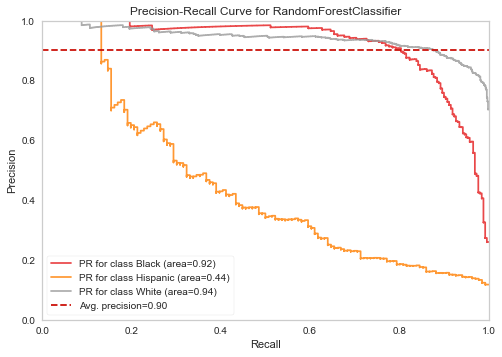

In [63]:
model = RandomForestClassifier(class_weight="balanced", random_state=47, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [64]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [65]:
import xgboost as xgb

xgb.__version__

'0.90'

In [66]:
xgb_model = XGBClassifier(random_state=47)

In [67]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 2.8330264 , 0.50703142, ..., 0.50703142, 2.8330264 ,
       0.50703142])

In [68]:
#Class weights
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [69]:
#pip uninstall xgboost

In [70]:
#pip install xgboost==0.90

In [71]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=47)

In [72]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[227  18  15]
 [ 11  95  30]
 [ 27 106 625]]
              precision    recall  f1-score   support

       Black       0.86      0.87      0.86       260
    Hispanic       0.43      0.70      0.54       136
       White       0.93      0.82      0.88       758

    accuracy                           0.82      1154
   macro avg       0.74      0.80      0.76      1154
weighted avg       0.86      0.82      0.83      1154


Train_Set
[[ 976   24   38]
 [  17  463   63]
 [  92  331 2611]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.57      0.85      0.68       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.90      0.88      0.88      4615



In [73]:
model = XGBClassifier(random_state=47)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.502936
test_precision_Hispanic    0.422573
test_recall_Hispanic       0.624310
dtype: float64

### XGBoost Model GridsearchCV

In [74]:
param_grid = {"n_estimators":[50, 100],
              'max_depth':[1,2],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.8, 1],
              "colsample_bytree":[0.8, 1]}

In [75]:
xgb_model = XGBClassifier(random_state=47)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [76]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.3,
 'max_depth': 2,
 'n_estimators': 50,
 'subsample': 1}

In [77]:
xgb_grid_model.best_score_

0.6352531430513082

In [78]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[223  21  16]
 [ 12  92  32]
 [ 24 129 605]]
              precision    recall  f1-score   support

       Black       0.86      0.86      0.86       260
    Hispanic       0.38      0.68      0.49       136
       White       0.93      0.80      0.86       758

    accuracy                           0.80      1154
   macro avg       0.72      0.78      0.73      1154
weighted avg       0.85      0.80      0.81      1154


Train_Set
[[ 952   40   46]
 [  36  434   73]
 [ 117  407 2510]]
              precision    recall  f1-score   support

       Black       0.86      0.92      0.89      1038
    Hispanic       0.49      0.80      0.61       543
       White       0.95      0.83      0.89      3034

    accuracy                           0.84      4615
   macro avg       0.77      0.85      0.79      4615
weighted avg       0.88      0.84      0.85      4615



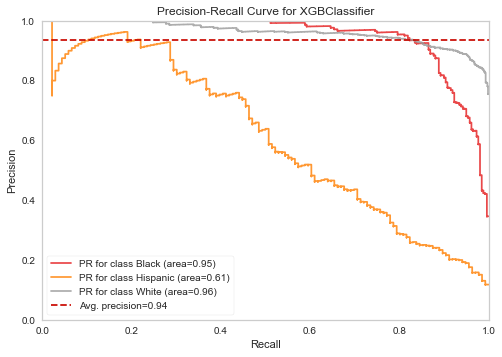

In [79]:
model = XGBClassifier(learning_rate=0.3, max_depth=2,
              random_state=47, subsample=1)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [80]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

# Model Comparison

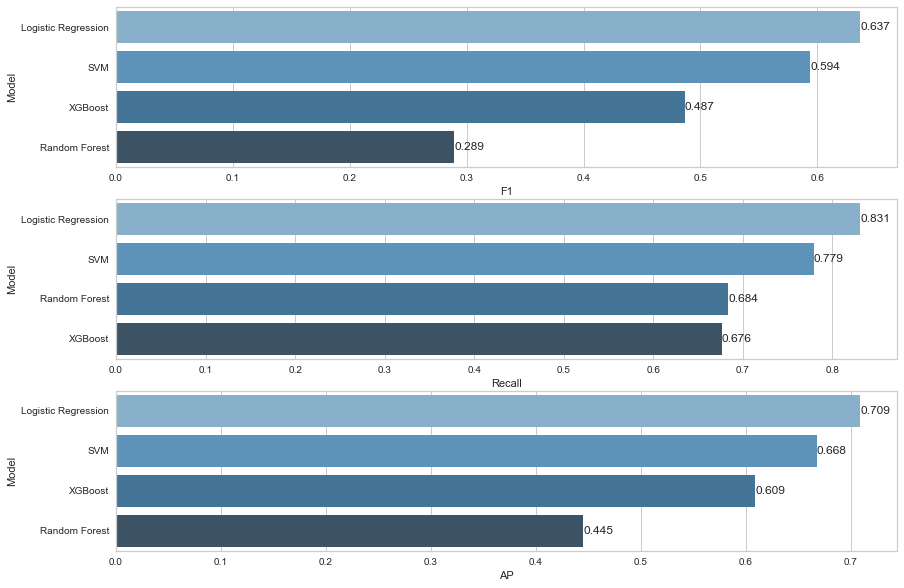

In [81]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

# According to this comparison, best model is Logistic Regression. Thus, I'll be using Logistic Regression

In [82]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=47))]
final_model = Pipeline(steps=operations)

In [83]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=47))])

In [84]:
X.describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference   chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion   earbreadth    earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal   footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference   handlength  headbreadth  headcircumference   headlength  heelanklecircumference  heelbreadth   hipbreadth  hipbreadthsitting  iliocristaleheight  \
count                     5769.000000     5769.000000            5769.000000         5769.000000   5769.000000              5769.000000       5769.000000        5769.000000                5769.000000       5769.000000       5769.000000         5769.000000       5769.000000                5769.000000         5769.000000           5769.000000   5769.000000    5769.000000        5769.000000             5769.000000        5769.000000      5769.000000   5769.000000         5769.000000  5769.000000  5769.000000   5769.000000            5769.000000                     5769.000000  5769.000000  5769.000000    5769.000000      5769.000000       5769.000000            5769.000000  5769.000000                5769.000000                 5769.000000            5769.000000        5769.000000          5769.000000  5769.000000        5769.000000  5769.000000  5769.000000        5769.000000  5769.000000             5769.000000  5769.000000  5769.000000        5769.000000         5769.000000   
mean                       247.254290     1408.630265             328.071590          225.201768   1301.902583               244.408043        195.118911         399.706015                 341.663027        274.903449        491.454845           72.335413        324.962212                 306.677760          139.529381           1022.059456    242.234356     872.112845         610.449991              498.331773         386.316519      1479.952158    283.232623         1024.206622   252.322586  1254.290172    827.105738             622.693708                      351.880222    35.175420    62.606171      22.227249       240.553302        786.399203              98.915063   263.512394                 339.458832                  295.661640             553.098284         467.898769          1104.347201    85.098111         204.215635   189.574796   152.043682         570.424337   196.640839              333.274918    70.834113   348.930837         386.417923         1042.152366   
std                         37.457748       78.303123              20.444554           15.965783     71.260913                16.803556         13.379000          30.124094                  41.270615         19.239580         42.011888            5.326965         17.050426                  20.818789            7.248670             75.952953     26.409001      54.064846          33.120828               28.512562          30.577787        83.590746     20.612214          100.375776    26.660255    78.882449     54.056267              45.087220                       29.807293     3.221118     4.861629       3.149012        28.595503         41.843182               6.658949    17.231642                  23.081597                   29.857253              62.255490          29.785714            67.719289     6.320915          15.486056    11.422521     6.176650          18.245395     8.322907               22.260663     5.932530    25.191381          32.273943           59.102058   
min                        155.000000  

In [85]:
#Retrieve mean values to use as an input data to the model.
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                   247.254290
acromialheight                                  1408.630265
acromionradialelength                            328.071590
anklecircumference                               225.201768
axillaheight                                    1301.902583
balloffootcircumference                          244.408043
balloffootlength                                 195.118911
biacromialbreadth                                399.706015
bicepscircumferenceflexed                        341.663027
bicristalbreadth                                 274.903449
bideltoidbreadth                                 491.454845
bimalleolarbreadth                                72.335413
bitragionchinarc                                 324.962212
bitragionsubmandibulararc                        306.677760
bizygomaticbreadth                               139.529381
buttockcircumference                            1022.059456
buttockdepth                            

In [86]:
final_model.predict([mean_human])

array(['White'], dtype=object)

In [87]:
y[182]

'Hispanic'

In [88]:
#Model made a correct prediction.
final_model.predict(X.loc[[182]])

array(['Hispanic'], dtype=object)

In [89]:
#This evaulation metric useful for multiclass 
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7868323994266899

In [90]:
#This evaulation metric useful for multiclass
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7780413015923973

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [2]:
#Used for imbalanced data
#!pip install imblearn --user

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [20]:
#Oversampling
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)

In [21]:
X_over.shape

(9102, 233)

In [22]:
y_over.value_counts()

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [23]:
#Undersampling
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [24]:
X_under.shape

(1629, 233)

In [25]:
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [26]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [27]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [28]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [29]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [30]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [33]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [34]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [35]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

# Logistic Regression Over&Under

In [36]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(max_iter=10000,random_state=47))]

In [37]:
smote_pipeline = imbpipeline(steps=operations)

In [38]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log', LogisticRegression(max_iter=10000, random_state=47))])

In [39]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[232  11  17]
 [  7  83  46]
 [ 10  36 712]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       260
    Hispanic       0.64      0.61      0.62       136
       White       0.92      0.94      0.93       758

    accuracy                           0.89      1154
   macro avg       0.83      0.81      0.82      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[ 955   23   60]
 [  23  360  160]
 [  30  135 2869]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.69      0.66      0.68       543
       White       0.93      0.95      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.84      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [42]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.631923
test_precision_Hispanic    0.656816
test_recall_Hispanic       0.611313
dtype: float64

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [43]:
#pip install shap

In [45]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
#Penalty term is l1 (Lasso), so feature selection
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=47, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=47, solver='saga')

In [47]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[241  12   7]
 [  7 112  17]
 [ 24  95 639]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.51      0.82      0.63       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 976   35   27]
 [  23  448   72]
 [  65  338 2631]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.83      0.66       543
       White       0.96      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.89      4615



In [48]:

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=47, penalty="l1", solver='saga'))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.606378
test_precision_Hispanic    0.505487
test_recall_Hispanic       0.762525
dtype: float64

# Getting SHAP values

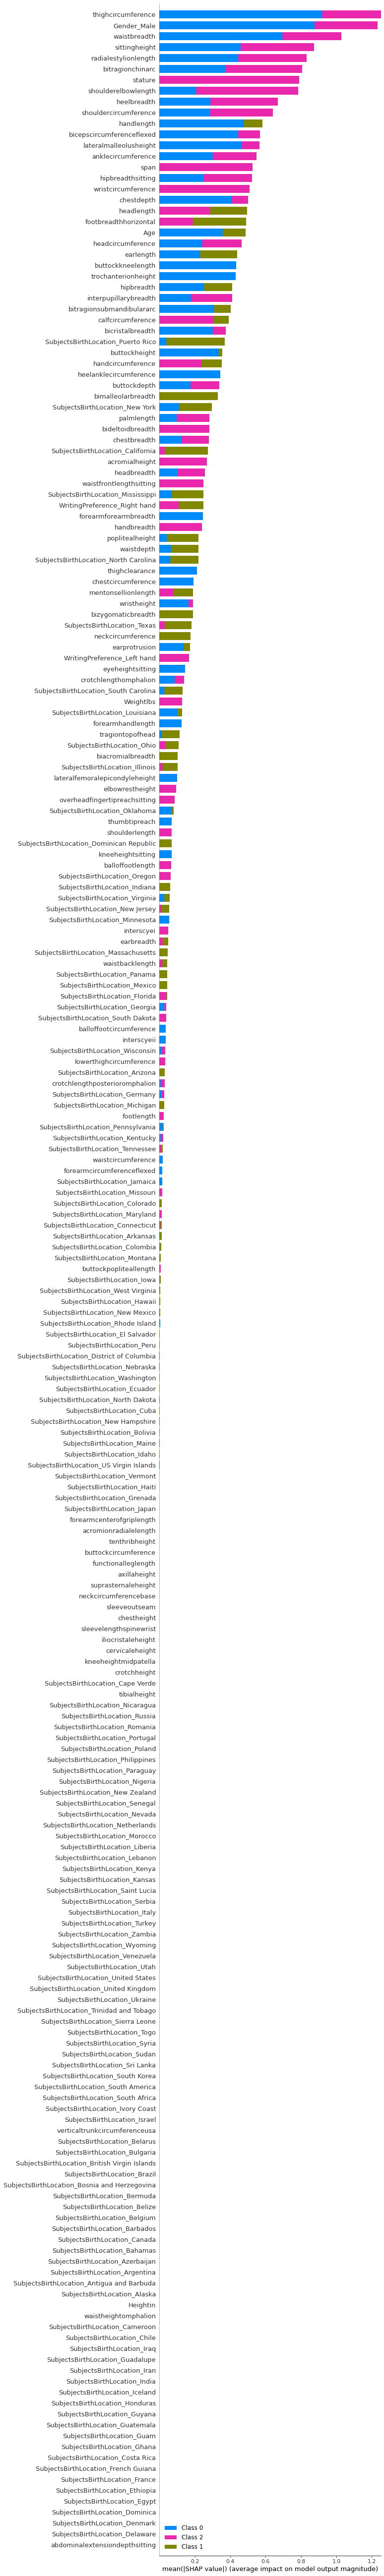

In [49]:
import shap

explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, max_display=300,feature_names = X.columns)

# Feature Selection With SHAP

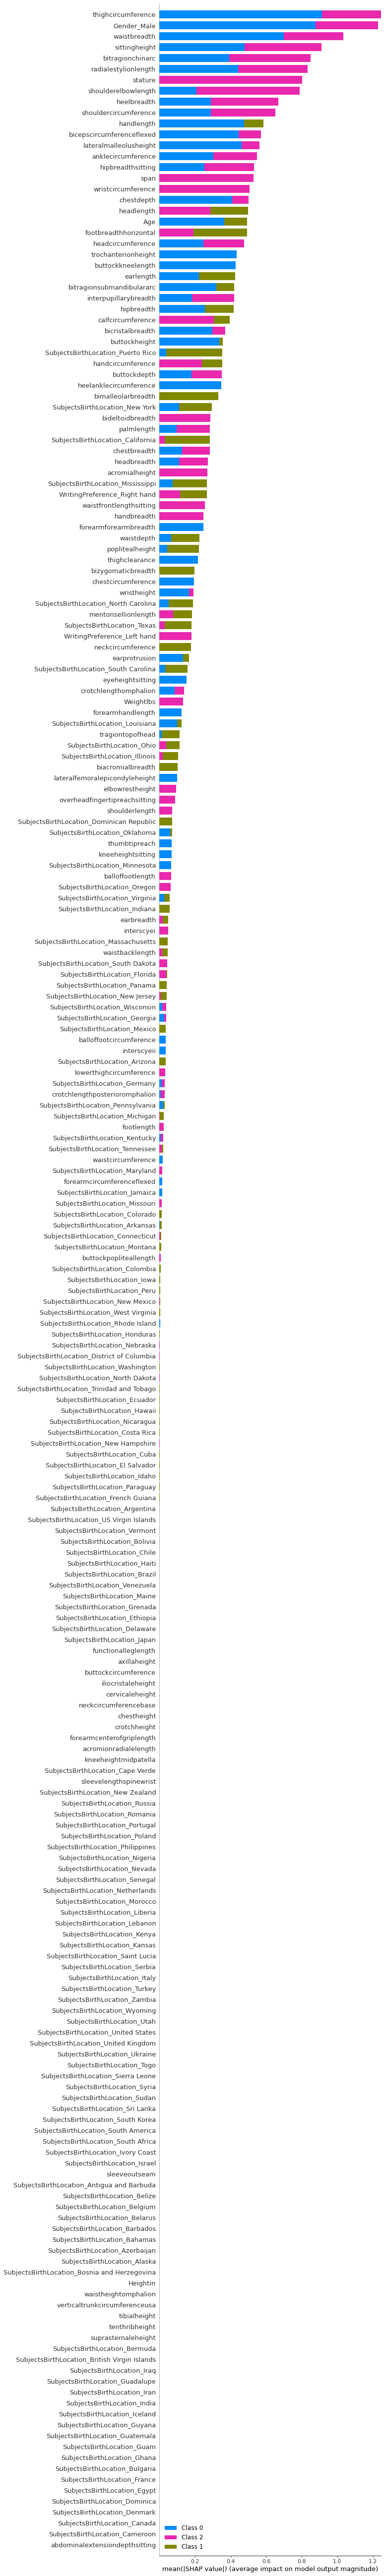

In [50]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

In [51]:
#Selecting the important features for Hispanic class.
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [53]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace

In [54]:
X3.shape

(5769, 154)

In [55]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=47, stratify =y)

In [56]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=47,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [57]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=47,
                                    solver='saga'))])

In [58]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[211  10  39]
 [  9 106  21]
 [ 97 120 541]]
              precision    recall  f1-score   support

       Black       0.67      0.81      0.73       260
    Hispanic       0.45      0.78      0.57       136
       White       0.90      0.71      0.80       758

    accuracy                           0.74      1154
   macro avg       0.67      0.77      0.70      1154
weighted avg       0.79      0.74      0.75      1154


Train_Set
[[ 878   51  109]
 [  30  436   77]
 [ 372  499 2163]]
              precision    recall  f1-score   support

       Black       0.69      0.85      0.76      1038
    Hispanic       0.44      0.80      0.57       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.75      0.77      4615



In [59]:
# We delete some features, so our recall&F1 scores decrease. However, our model works faster.
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_f1_Hispanic           0.540866
test_precision_Hispanic    0.421527
test_recall_Hispanic       0.757003
dtype: float64

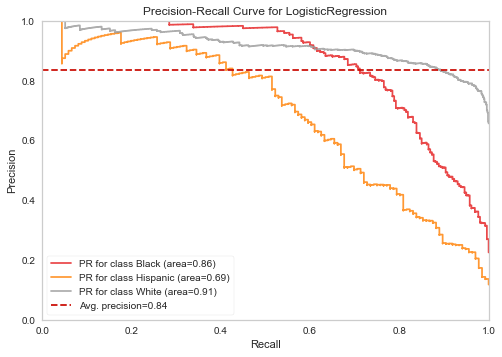

In [60]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [61]:
#Our target is Hispanic. Thus, we make both White and Black 0.
y2 = y.map({"Hispanic":1, "White":0, "Black":0})

In [62]:
y2

0       0
1       0
2       0
3       0
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [63]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=101, stratify =y2)

In [65]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=47))]
pipe_shap_model2 = Pipeline(steps=operations)

In [66]:
pipe_shap_model2.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=47))])

In [67]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)

Test_Set
[[822 196]
 [ 28 108]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1018
           1       0.36      0.79      0.49       136

    accuracy                           0.81      1154
   macro avg       0.66      0.80      0.69      1154
weighted avg       0.89      0.81      0.83      1154


Train_Set
[[3381  691]
 [  88  455]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      4072
           1       0.40      0.84      0.54       543

    accuracy                           0.83      4615
   macro avg       0.69      0.83      0.72      4615
weighted avg       0.91      0.83      0.85      4615



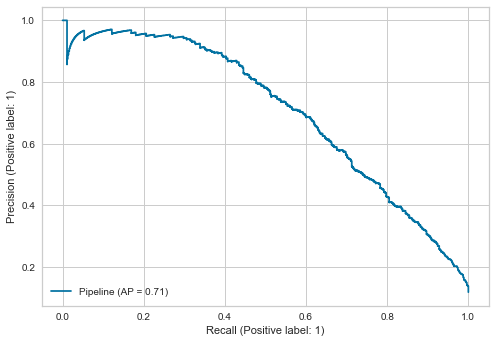

In [68]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=47))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [69]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

0.7054275890950658

In [70]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [71]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.31482998855016686

In [72]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [73]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

[[679 339]
 [ 18 118]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1018
           1       0.26      0.87      0.40       136

    accuracy                           0.69      1154
   macro avg       0.62      0.77      0.59      1154
weighted avg       0.89      0.69      0.75      1154



In [74]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

[[2806 1266]
 [  40  503]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      4072
           1       0.28      0.93      0.44       543

    accuracy                           0.72      4615
   macro avg       0.64      0.81      0.62      4615
weighted avg       0.90      0.72      0.77      4615



In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 47)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [76]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=47))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

Accuracy      70.99%  std 2.54%
Precision-1   27.60%  std 1.97%
Recall-1      89.48%  std 3.46%
F1_score-1    42.15%  std 2.45%
